In [ ]:
#default_exp callback.data

# Data Callbacks

> Callbacks which work with a learner's data

In [ ]:
#export
from local.test import *
from local.basics import *

In [ ]:
from local.notebook.showdoc import *
from local.test_utils import *

In [ ]:
#export
class CollectDataCallback(Callback):
    "Collect all batches, along with `pred` and `loss`, into `self.data`. Mainly for testing"
    def begin_fit(self): self.data = L()
    def after_batch(self): self.data.append(to_detach((self.xb,self.yb,self.pred,self.loss)))

In [ ]:
#export
@delegates()
class WeightedDL(TfmdDL):
    def __init__(self, dataset=None, bs=None, wgts=None, **kwargs):
        super().__init__(dataset=dataset, bs=bs, **kwargs)
        wgts = array([1.]*len(dataset) if wgts is None else wgts)
        self.wgts = wgts/wgts.sum()
        
    def get_idxs(self):
        if self.n==0: return []
        return list(np.random.choice(self.n, self.n, p=self.wgts))

In [ ]:
#export
@patch
@delegates(DataSource.databunch)
def weighted_databunch(self:DataSource, wgts, bs=16, **kwargs):
    xtra_kwargs = [{}] * (self.n_subsets-1)
    return dsrc.databunch(bs=bs, dl_type=WeightedDL, dl_kwargs=({'wgts':wgts}, *xtra_kwargs), **kwargs)

In [ ]:
n = 160
dsrc = DataSource(torch.arange(n).float())
dbch = dsrc.weighted_databunch(wgts=range(n), bs=16)
learn = synth_learner(data=dbch, cb_funcs=CollectDataCallback)

(#4) [0,None,None,00:00]


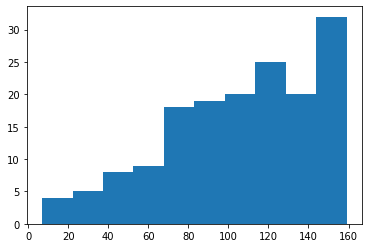

In [ ]:
learn.fit(1)
t = concat(*learn.collect_data.data.itemgot(0,0))
plt.hist(t);

## Export -

In [ ]:
#hide
from local.notebook.export import notebook2script
notebook2script(all_fs=True)

Converted 00_test.ipynb.
Converted 01_core.ipynb.
Converted 01a_utils.ipynb.
Converted 01b_dispatch.ipynb.
Converted 01c_transform.ipynb.
Converted 02_script.ipynb.
Converted 03_torch_core.ipynb.
Converted 03a_layers.ipynb.
Converted 04_dataloader.ipynb.
Converted 05_data_core.ipynb.
Converted 06_data_transforms.ipynb.
Converted 07_data_block.ipynb.
Converted 08_vision_core.ipynb.
Converted 09_vision_augment.ipynb.
Converted 10_pets_tutorial.ipynb.
Converted 11_vision_models_xresnet.ipynb.
Converted 12_optimizer.ipynb.
Converted 13_learner.ipynb.
Converted 13a_metrics.ipynb.
Converted 14_callback_schedule.ipynb.
Converted 14a_callback_data.ipynb.
Converted 15_callback_hook.ipynb.
Converted 15a_vision_models_unet.ipynb.
Converted 16_callback_progress.ipynb.
Converted 17_callback_tracker.ipynb.
Converted 18_callback_fp16.ipynb.
Converted 19_callback_mixup.ipynb.
Converted 21_vision_learner.ipynb.
Converted 22_tutorial_imagenette.ipynb.
Converted 23_tutorial_transfer_learning.ipynb.
Conve